In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("~/Downloads/bfd train.csv")

In [3]:
test=pd.read_csv("~/Downloads/bfd test.csv")

In [4]:
train.shape

(550068, 12)

In [5]:
#merging train and test
data=train.append(test)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [9]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
data.shape

(783667, 12)

## Null values

In [11]:
#null values in product category shows no value in that category for specific product 
# lets replace with 0
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)
     

In [12]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [13]:
#relative frequency in user id and product id
map_userid=data['User_ID'].value_counts()/len(data['User_ID'])
data['User_ID']=data['User_ID'].map(map_userid)

In [14]:
map_productid=data['Product_ID'].value_counts()/len(data['Product_ID'])
data['Product_ID']=data['Product_ID'].map(map_productid)

In [15]:
#dropping product id and user id
#data.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


## EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

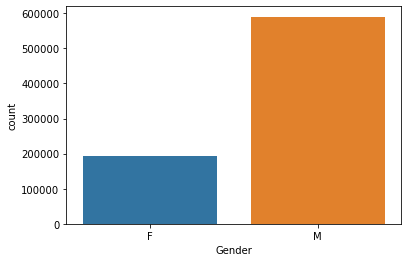

In [17]:
#purchase vs gender
sns.countplot('Gender',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

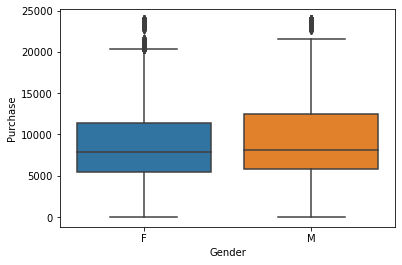

In [18]:
sns.boxplot(x=data.Gender,y=data.Purchase)

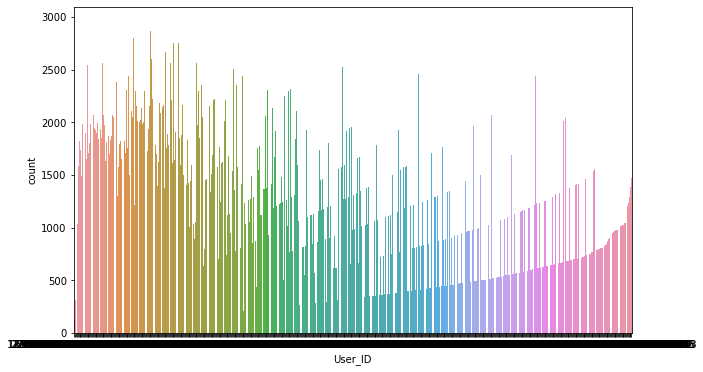

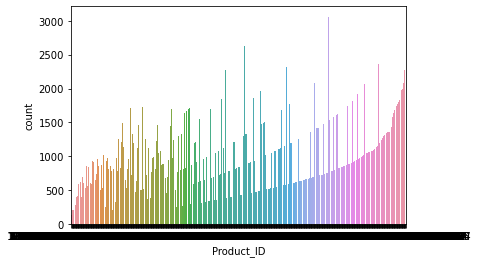

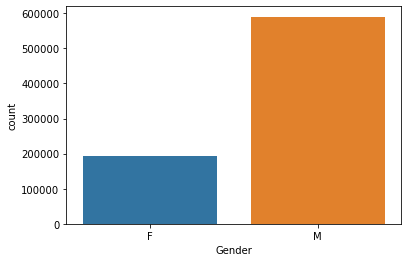

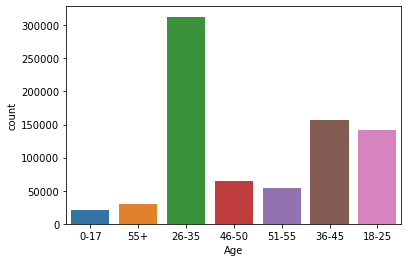

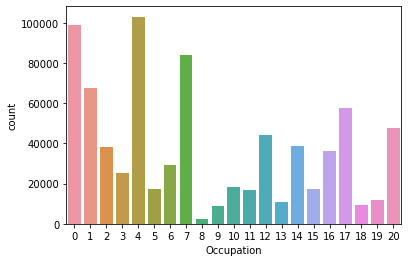

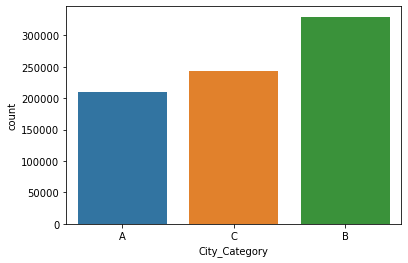

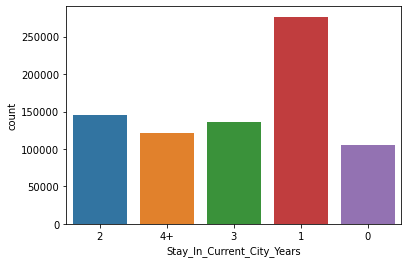

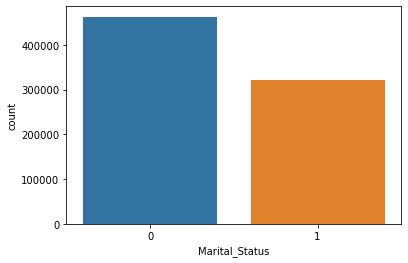

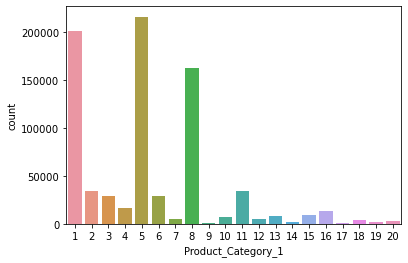

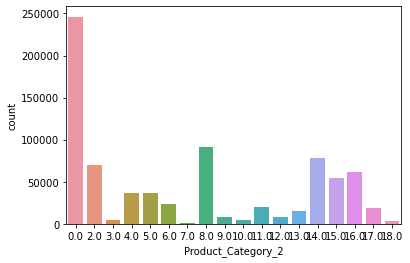

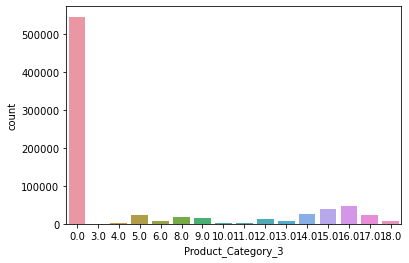

In [19]:
#univariate
plt.figure(figsize=(10,6))
for i in data.columns:
    if i!='Purchase':
        sns.countplot(data[i])
        plt.show()

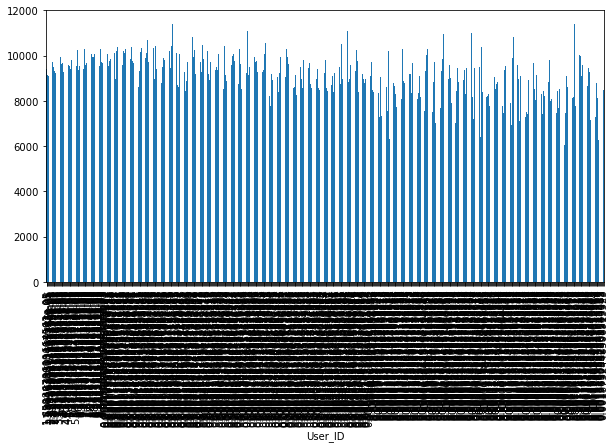

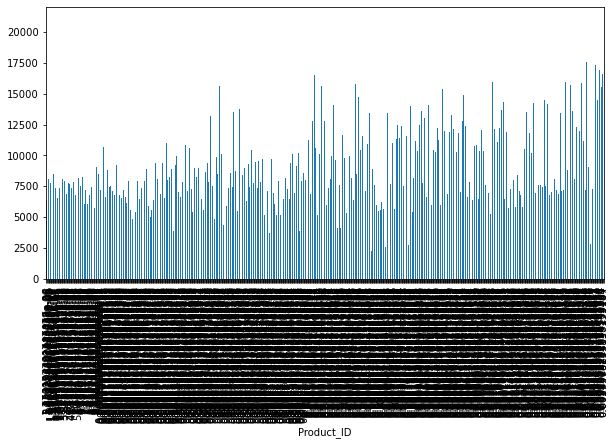

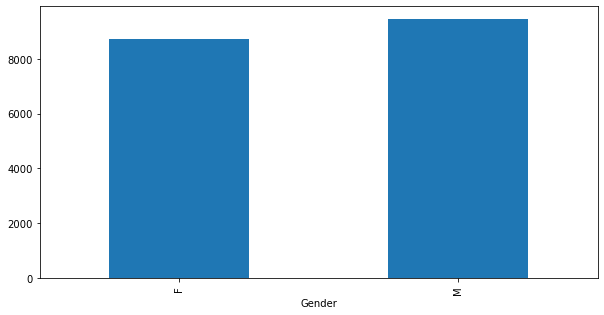

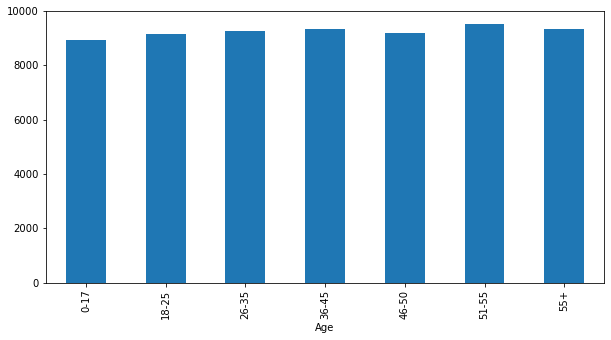

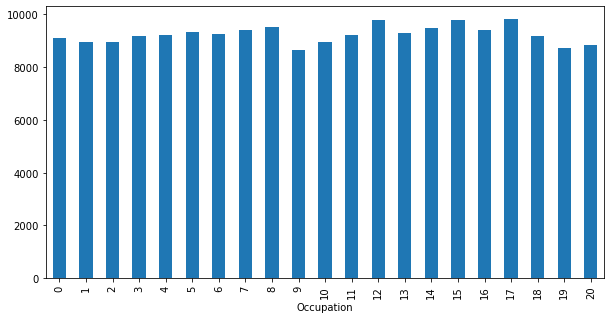

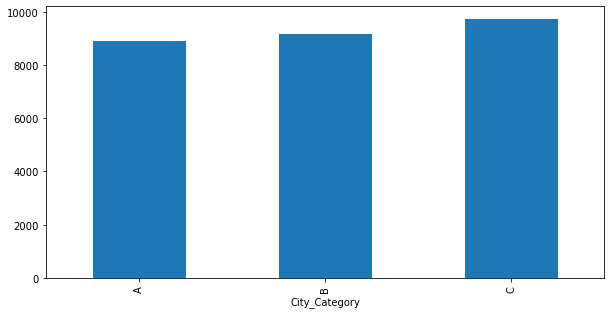

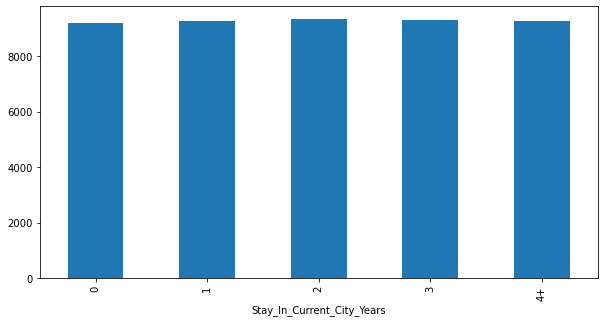

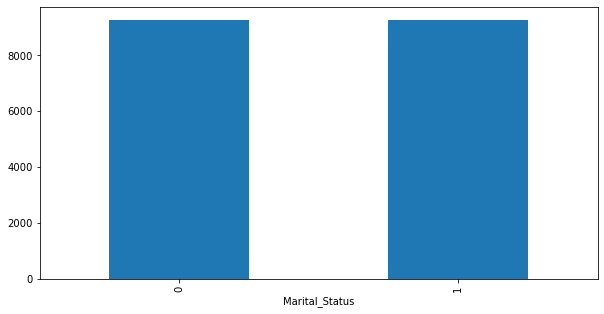

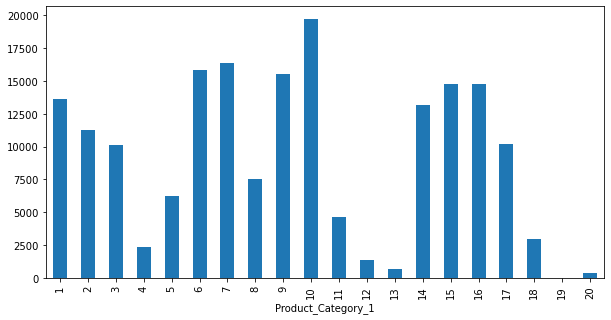

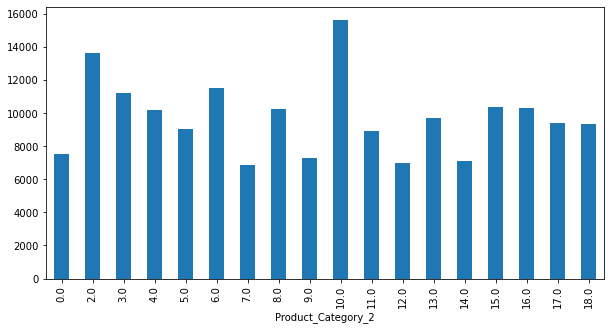

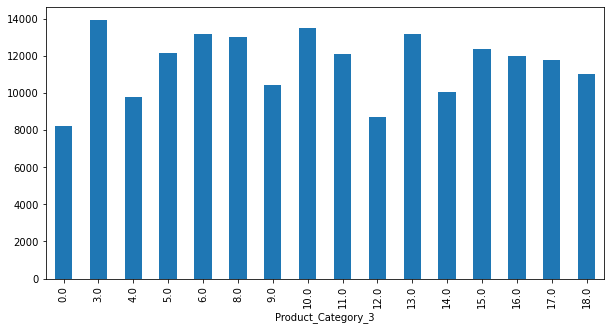

<Figure size 720x360 with 0 Axes>

In [20]:
#bivariate 
for i in data.columns:
    plt.figure(figsize=(10,5))
    if i!= 'Purchase':
        
        data.groupby(by=[i])['Purchase'].mean().plot.bar()
        plt.show()

In [21]:
#categorical treatment
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].apply(lambda x:x[0])

In [22]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,55+,16,C,4,0,8,0.0,0.0,7969.0


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
data['Age']=le.fit_transform(data['Age'])

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,6,16,C,4,0,8,0.0,0.0,7969.0


In [26]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('int')

In [27]:
data=pd.get_dummies(data,drop_first=True)

In [28]:
data.shape

(783667, 13)

In [29]:
#splitting data in test and train
final_Train=data.loc[~data.Purchase.isnull(),:]

In [30]:
final_Train.shape

(550068, 13)

In [31]:
final_Test=data.loc[data.Purchase.isnull(),:]

In [32]:
final_Test.shape

(233599, 13)

In [33]:
#for cross validation lets split our train data
X=final_Train.drop('Purchase',axis=1)

In [34]:
X.shape

(550068, 12)

In [35]:
import statsmodels.api as sm

In [36]:
X=sm.add_constant(X)

In [37]:
y=final_Train['Purchase']

In [38]:
y.shape

(550068,)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.2)

In [41]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((440054, 13), (110014, 13), (110014,), (440054,))

In [42]:
model=sm.OLS(y_train,X_train).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     9139.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:42:12   Log-Likelihood:            -4.3255e+06
No. Observations:              440054   AIC:                         8.651e+06
Df Residuals:                  440041   BIC:                         8.651e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8556.8842     32.880    260.242      0.000    8492.440    8621.329
User_ID                    -4.622e+05   2.56e+04    -18.057      0.000   -5.12e+05   -4.12e+05
Product_ID                  1.692e+06    1.1e+04    153.368      0.000    1.67e+06    1.71e+06
Age                          128.6561      5.336     24.112      0.000     118.198     139.114
Occupation                     4.5907      1.051      4.368      0.000       2.531       6.650
Stay_In_Current_City_Years    13.2272      5.260      2.515      0.012       2.918      23.537
Marital_Status               -36.6675     14.505     -2.528      0.011     -65.096      -8.239
Product_Category_1          -309.8231      1.888   -164.123      0.000    -313.523    -306.123
Product_Category_2            -2.1573      1.099     -1.963      0.050      -4.312      -0.003
Product_Category_3           106.2691      1.201     88.484      0.000     103.915     108.623
Gender_M                     479.7461     15.903     30.167      0.000     448.577     510.915
City_Category_B               33.1936     17.223      1.927      0.054      -0.563      66.950
City_Category_C              141.2985     21.057      6.710      0.000     100.027     182.570
==============================================================================
Omnibus:                    45210.857   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63268.606
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       3.877   Cond. No.                     5.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# almost all variables are categorical so we can say that this data is not made for linear model


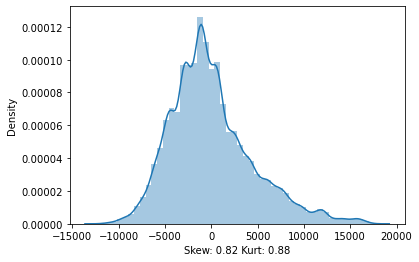

In [45]:
# distplot of residuals
sns.distplot(model.resid)
plt.xlabel('Skew: %.2f Kurt: %.2f'%(model.resid.skew(),model.resid.kurt()))
plt.show()

In [46]:
# multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

In [48]:
pd.DataFrame({'VIF':vif[:]},index=X_train.columns).sort_values(by=['VIF'],ascending=False)

,VIF
const,23.553619
City_Category_C,2.071263
City_Category_B,1.574682
User_ID,1.448297
Product_Category_3,1.229047
Product_Category_1,1.205720
Product_ID,1.153860
Age,1.136892
Marital_Status,1.108732
Gender_M,1.024818


In [50]:
#trying other regularization models
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={'alpha':[0.01,0.1,1,10],
           'l1_ratio':[0,0.3,0.5,1]}

In [52]:
gscv=GridSearchCV(estimator=ElasticNet(),
                 param_grid=param_grid,
                 scoring='r2',
                 verbose=3,cv=3)

In [53]:
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ............alpha=0.01, l1_ratio=0;, score=0.151 total time=  15.3s
[CV 2/3] END ............alpha=0.01, l1_ratio=0;, score=0.155 total time=  15.1s
[CV 3/3] END ............alpha=0.01, l1_ratio=0;, score=0.152 total time=  15.1s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.151 total time=   0.3s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.155 total time=   0.2s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.152 total time=   0.2s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.151 total time=   0.3s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.155 total time=   0.2s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.152 total time=   0.2s
[CV 1/3] END ............alpha=0.01, l1_ratio=1;, score=0.199 total time=   0.3s
[CV 2/3] END ............alpha=0.01, l1_ratio=1;, score=0.202 total time=   0.3s
[CV 3/3] END ............alpha=0.01, l1_ratio=1;

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.3, 0.5, 1]},
             scoring='r2', verbose=3)

In [54]:
gscv.best_score_

0.19933792730362507

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error

In [58]:
def model_result(model,X_train,y_train,X_test,y_test):
    print(str(model))
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    n=X.shape[0]
    p=X.drop('const',axis=1).shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    print('R2',r2)
    print('adj_R2',adj_r2)
    print('MSE ',mean_squared_error(y_test,y_pred))
    print('RMSE',mean_squared_error(y_test,y_pred)**0.5,'\n')

In [60]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()


In [61]:
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)

In [62]:
model_result(KNeighborsRegressor(n_neighbors=7),X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=7)
R2 0.47740519981993346
adj_R2 0.47739379889165867
MSE  13183740.203627516
RMSE 3630.9420545675907 

